In [1]:

from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
import matplotlib.pyplot as plt
from python_modules.muonpipe import usefull_func
import numpy as np
import glob
from matplotlib.patches import Circle
import pandas as pd
from datetime import datetime
size_outside = 400 # phe

In [19]:
listdir= glob.glob('/Users/vdk/muons2024/georgios_muons/output/table_muons/*')
dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

        
df = dat.to_pandas()
df_ref_data = df[df['good_ring'] & (df['muon_efficiency'] < 1) & (df['ring_containment'] > 0.9) & (df['size_outside'] < 500)]

#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/*')
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

#df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[0:5]] # [0:5] for 19-22 years, [5:] for 22-23 years
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['ring_containment'] > 0.9) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_96149/471635333.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_96149/471635333.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_96149/471635333.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_96149/471635333.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on i

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336089,996770.0,1.653273e+09,-1.0,2015.0510,0.000000,0.512116,0.483841,1.157890,0.062869,True,...,9.839332,-6.366383,-7.502107,0.052375,0.153007,-0.114217,468.0,0.230245,13.0,0.0
5336090,997090.0,1.653273e+09,-1.0,1761.8718,0.000000,-0.673674,0.369198,0.921547,0.077395,True,...,6.585348,-0.683268,6.549805,0.064656,0.259657,0.171233,294.0,-0.153978,11.0,0.0
5336091,1000315.0,1.653273e+09,-1.0,1477.8036,33.543670,1.344948,-0.444823,0.840882,0.097583,True,...,9.566866,-7.900910,5.394493,0.091365,-0.371986,0.668834,227.0,0.744889,10.0,0.0
5336092,1003990.0,1.653273e+09,-1.0,1420.9404,32.084183,-1.008049,-0.257874,0.824238,0.096866,True,...,5.152806,5.123992,-0.544160,0.082847,-0.326860,0.693994,236.0,1.089502,11.0,0.0


Mean value of the array = 6.4942431356880785 
Standard deviation = 2.0597893904898483


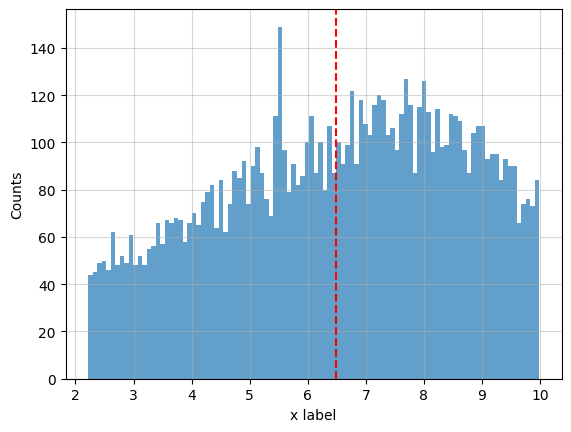

In [40]:
usefull_func.hist_wo_outliers(df_good_data['impact_parameter'],outlier_value=20)

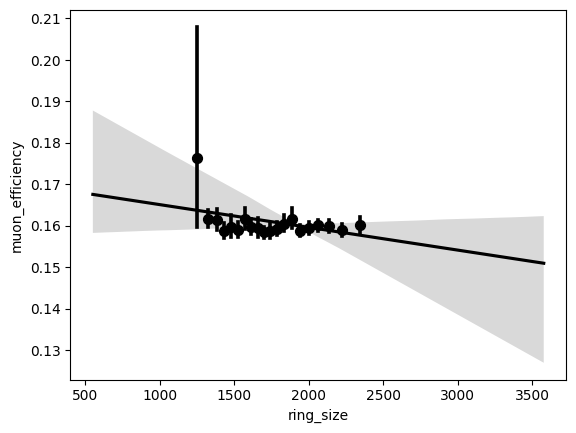

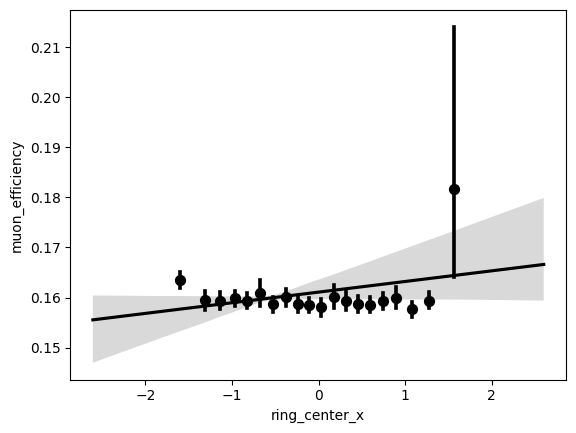

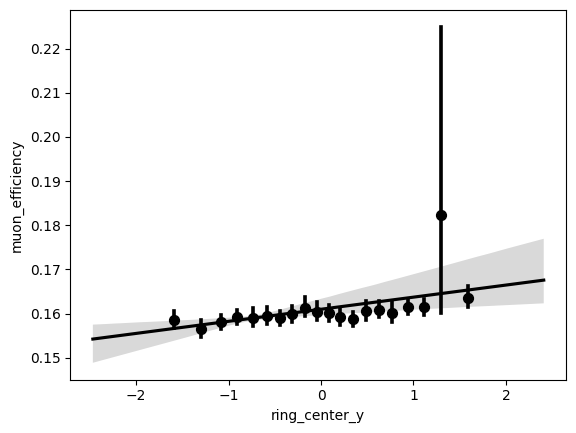

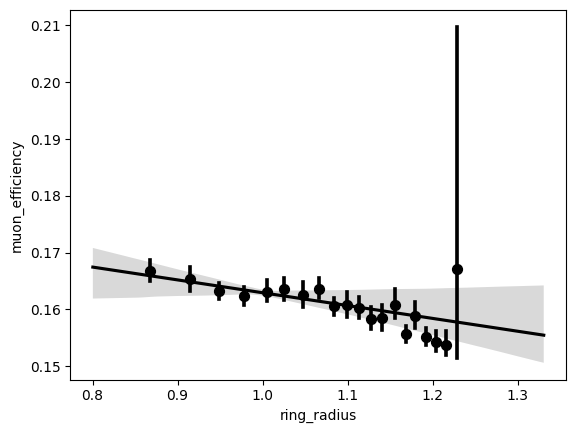

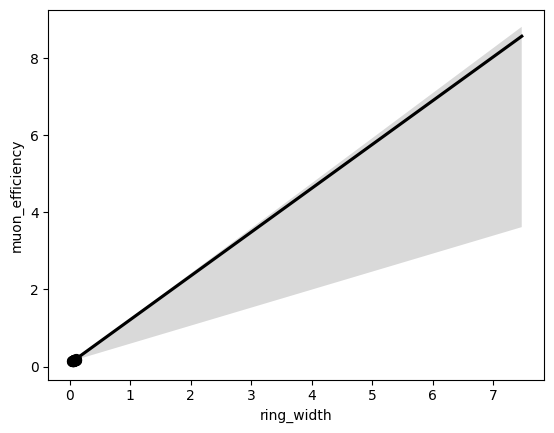

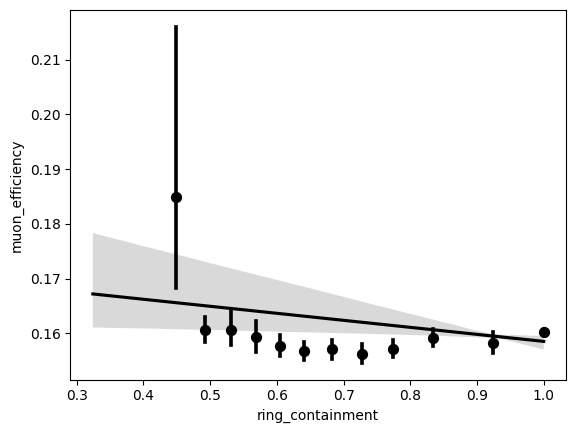

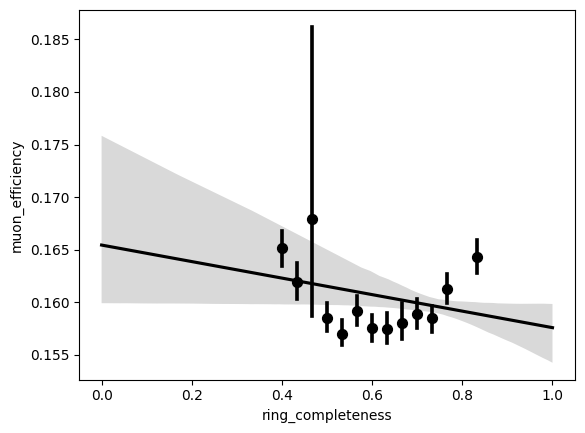

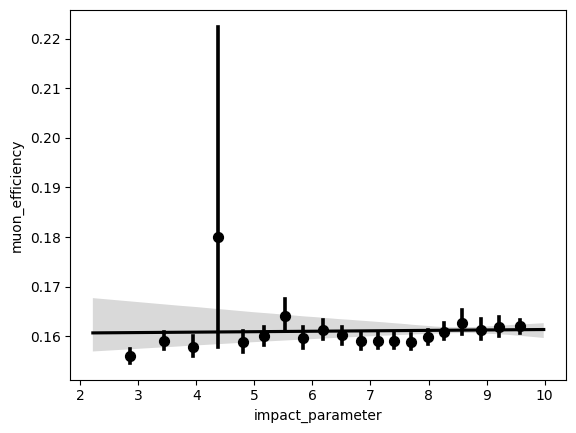

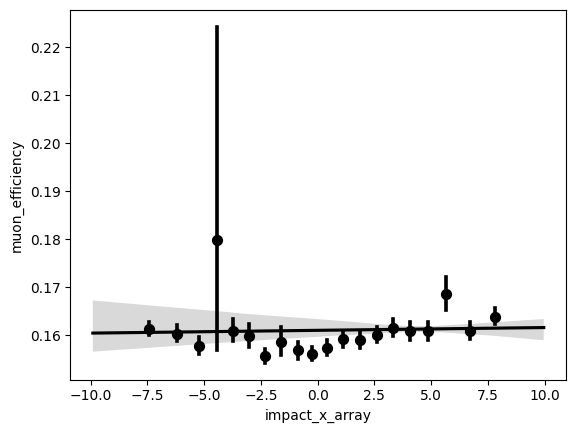

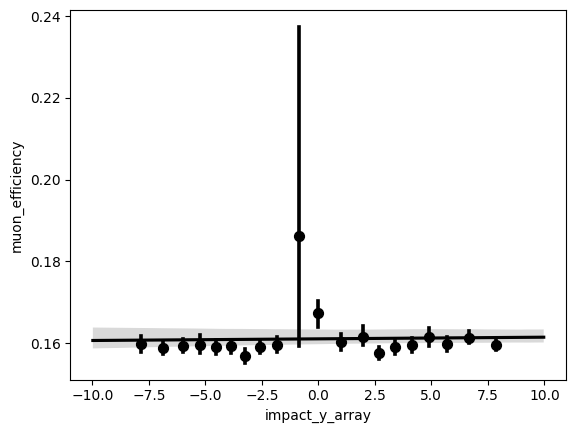

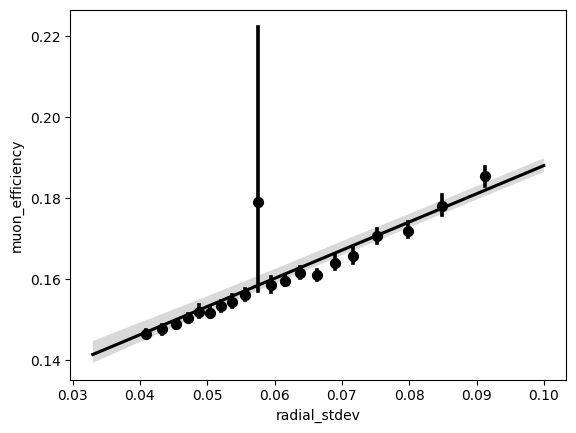

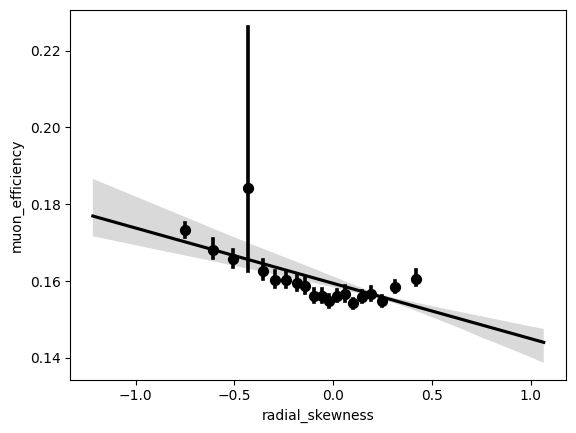

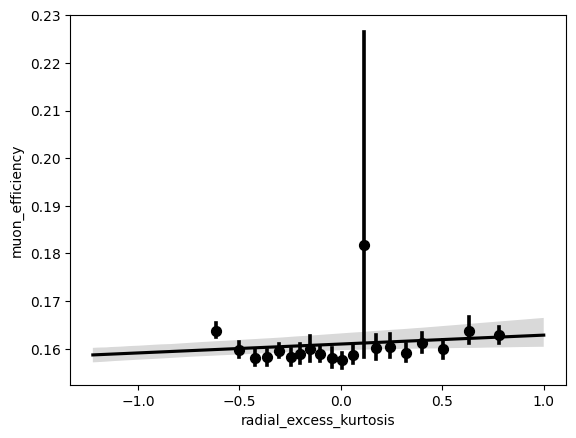

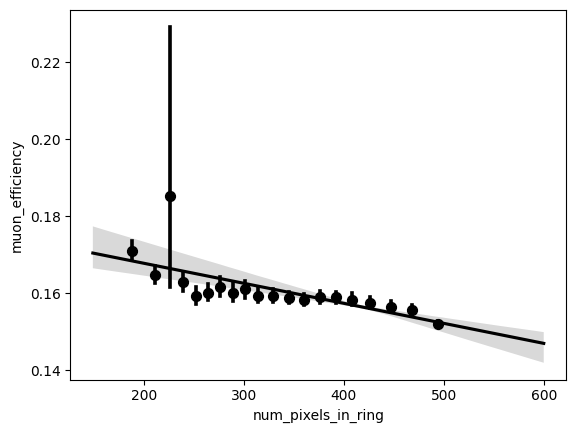

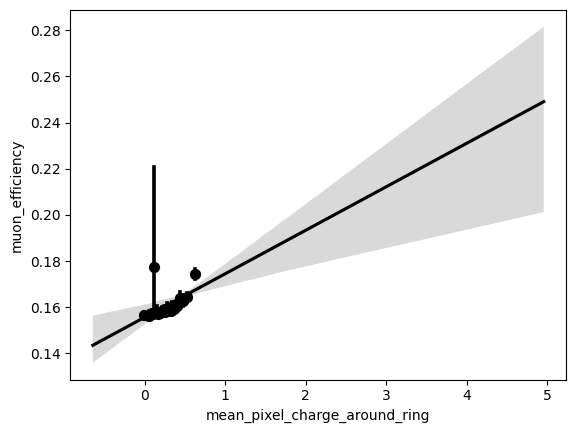

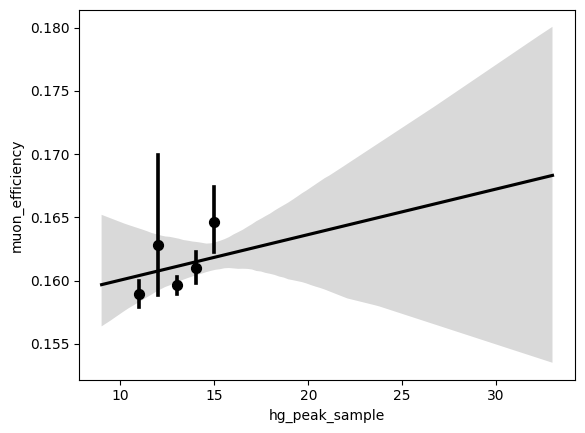

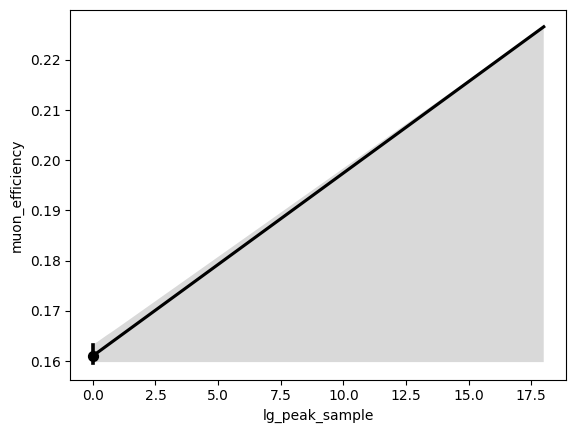

In [57]:
exclude_list = ['size_outside', 'good_ring', 'muon_efficiency']
for parameter in df_good_data.columns[3:]:
    if parameter not in exclude_list:
        plt.figure()
        sns.regplot(x = df_good_data[parameter], 
                y = df_good_data['muon_efficiency'], 
                x_bins=20, color = 'k', label = 'Run 16449')
        plt.show()

In [59]:
fits_file_path = '/Users/vdk/muons_LST-1.Run01618.0006.fits'
dat = Table.read(fits_file_path)
df = dat.to_pandas()
df_good_data = df[df['good_ring']]



for column in df_good_data.columns:
    print(column)
    

event_id
event_time
mc_energy
ring_size
size_outside
ring_center_x
ring_center_y
ring_radius
ring_width
good_ring
muon_efficiency
ring_containment
ring_completeness
impact_parameter
impact_x_array
impact_y_array
radial_stdev
radial_skewness
radial_excess_kurtosis
num_pixels_in_ring
mean_pixel_charge_around_ring
hg_peak_sample
lg_peak_sample


In [63]:
fits_file_path = '/Users/vdk/muons_LST-1.Run01618.0005.fits'
dat = Table.read(fits_file_path)
df = dat.to_pandas()
df_good_data = df[df['good_ring']]



for column in df_good_data.columns:
    print(column)
    

event_id
event_time
mc_energy
ring_size
size_outside
ring_center_x
ring_center_y
ring_radius
ring_width
good_ring
muon_efficiency
ring_containment
ring_completeness
impact_parameter
impact_x_array
impact_y_array
radial_stdev
radial_skewness
radial_excess_kurtosis
num_pixels_in_ring
mean_pixel_charge_around_ring
hg_peak_sample
lg_peak_sample


In [64]:
df_good_data

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,265168,1.574558e+09,-1,1260.793701,6.395715,1.282923,-1.654018,0.952935,0.093871,True,...,9.033664,3.492919,-8.331063,0.081098,-0.385471,-0.306346,164,0.193099,13,0
1,265186,1.574558e+09,-1,2804.137695,0.000000,-0.142586,-0.797168,1.169949,0.049541,True,...,6.104544,-1.866861,5.812082,0.049197,0.160237,0.143926,470,0.247816,13,0
2,265258,1.574558e+09,-1,1347.077148,18.077789,0.445589,-1.710562,0.861801,0.098554,True,...,2.699150,1.003990,-2.505477,0.083774,-0.760458,0.073277,174,0.394863,12,0
3,265621,1.574558e+09,-1,1828.528198,0.000000,-1.601236,0.493482,1.032458,0.073576,True,...,7.247219,3.938772,6.083442,0.063615,-0.822604,0.721143,236,0.158352,13,0
4,266488,1.574558e+09,-1,1898.336548,0.000000,-1.382144,-0.989285,1.049226,0.082281,True,...,4.864951,4.190833,-2.470762,0.075768,-0.535183,-0.252331,230,0.062961,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,316844,1.574558e+09,-1,1348.495850,0.000000,-1.215811,1.366254,0.948532,0.059305,True,...,4.374340,2.355110,-3.686232,0.051359,-0.146098,-0.084455,189,0.160381,11,0
195,317240,1.574558e+09,-1,1844.833008,0.000000,1.343670,1.460629,1.184385,0.039832,True,...,9.462472,-3.735016,8.694138,0.043845,-0.339461,-0.104520,248,0.387232,12,0
196,317459,1.574558e+09,-1,1835.731567,0.000000,-1.008204,1.032180,1.145513,0.047948,True,...,4.712929,1.087494,-4.585745,0.045900,0.250733,0.010144,325,0.263988,11,0
197,317499,1.574558e+09,-1,1435.977539,0.000000,-0.418634,1.867109,1.055910,0.071625,True,...,8.741400,-4.987731,7.178761,0.064533,0.250172,-0.600090,206,0.716887,13,0


(array([ 45., 117.,  27.,   6.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([0.1508447 , 0.18072871, 0.21061273, 0.24049674, 0.27038075,
        0.30026476, 0.33014877, 0.36003279, 0.3899168 , 0.41980081,
        0.44968482]),
 <BarContainer object of 10 artists>)

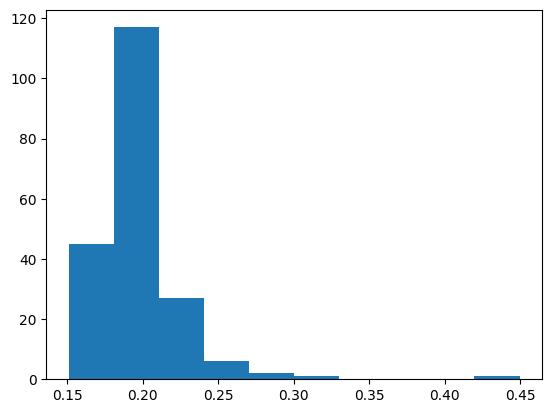

In [65]:
plt.hist(df_good_data['muon_efficiency'])

In [95]:
np.mean(df_good_data_3['muon_efficiency'])

0.13602246510845353

### Simulation upload

In [20]:
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0784-reflection/tables/*')
listdir2 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0684-reflection/tables/*')
listdir3 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0884-reflection/tables/*')



dat = Table.read('{}'.format(listdir[0]), format='fits')
for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])
df = dat.to_pandas()
df_good_data = df[df['good_ring'] & (df['ring_containment'] > 0.999) & (df['muon_efficiency'] < 1) & (df['size_outside'] < 500) & (df['ring_completeness'] > 0.9)]


dat = Table.read('{}'.format(listdir2[0]), format='fits')
for muon_file in listdir2:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])
df_2 = dat.to_pandas()
df_good_data_2 = df_2[df_2['good_ring'] & (df['ring_containment'] > 0.999) & (df_2['muon_efficiency'] < 1) & (df_2['size_outside'] < 500) & (df_2['ring_completeness'] > 0.9)]


dat = Table.read('{}'.format(listdir3[0]), format='fits')
for muon_file in listdir3:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])
df_3 = dat.to_pandas()
df_good_data_3 = df_3[df_3['good_ring'] & (df['ring_containment'] > 0.999) & (df['muon_efficiency'] < 1) & (df['size_outside'] < 500) & (df_3['ring_completeness'] > 0.9)]



/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_96149/246979892.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_good_data_2 = df_2[df_2['good_ring'] & (df['ring_containment'] > 0.999) & (df_2['muon_efficiency'] < 1) & (df_2['size_outside'] < 500) & (df_2['ring_completeness'] > 0.9)]


In [31]:
#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/*')
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

#df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[0:5]] # [0:5] for 19-22 years, [5:] for 22-23 years
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/467924475.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/467924475.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/467924475.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:7]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/467924475.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on impor

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336089,996770.0,1.653273e+09,-1.0,2015.0510,0.000000,0.512116,0.483841,1.157890,0.062869,True,...,9.839332,-6.366383,-7.502107,0.052375,0.153007,-0.114217,468.0,0.230245,13.0,0.0
5336090,997090.0,1.653273e+09,-1.0,1761.8718,0.000000,-0.673674,0.369198,0.921547,0.077395,True,...,6.585348,-0.683268,6.549805,0.064656,0.259657,0.171233,294.0,-0.153978,11.0,0.0
5336091,1000315.0,1.653273e+09,-1.0,1477.8036,33.543670,1.344948,-0.444823,0.840882,0.097583,True,...,9.566866,-7.900910,5.394493,0.091365,-0.371986,0.668834,227.0,0.744889,10.0,0.0
5336092,1003990.0,1.653273e+09,-1.0,1420.9404,32.084183,-1.008049,-0.257874,0.824238,0.096866,True,...,5.152806,5.123992,-0.544160,0.082847,-0.326860,0.693994,236.0,1.089502,11.0,0.0


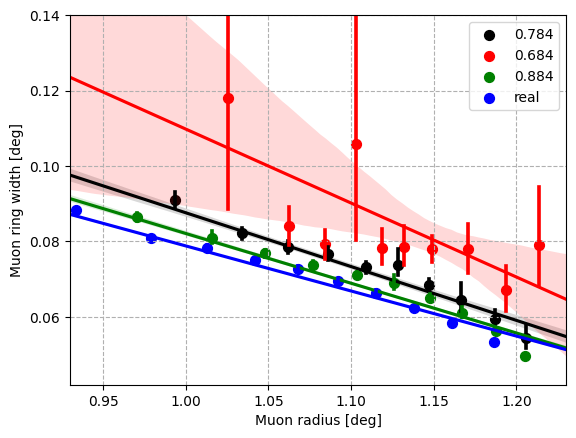

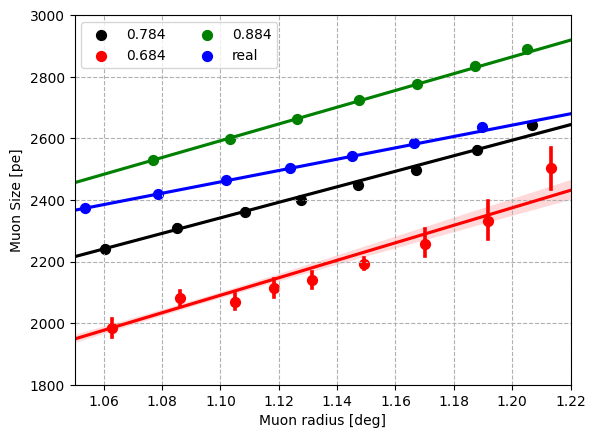

In [33]:
def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        ax.set_ylim(0.042,0.14)
        ax.set_xlim(0.93,1.23)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(1800,3000)
        ax2.set_xlim(1.05,1.22)

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'k', label = '0.784')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_width'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'r', label = '0.684')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_width'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'green', label = '0.884')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_real['ring_width'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'blue', label = 'real')

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'k', label = '0.784')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_size'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'r', label = '0.684')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_size'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'green', label = '0.884')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)], 
            y = df_good_data_real['ring_size'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)], 
            x_bins=10, ax=ax2, color = 'blue', label = 'real')



format_axes(ax,'width')        
format_axes(ax2,'size') 

In [9]:
print(f"Start date {datetime.fromtimestamp(min(df_good_data_real['event_time'])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"End date {datetime.fromtimestamp(max(df_good_data_real['event_time'])).strftime('%Y-%m-%d %H:%M:%S.%f')}")

Start date 2019-11-25 00:17:12.035896
End date 2022-05-23 04:27:46.382264


In [10]:
#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/*')
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

#df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[0:5]] # [0:5] for 19-22 years, [5:] for 22-23 years
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[7:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
1,1446.0,1.655767e+09,-1.0,2320.1460,0.000000,0.842760,-0.332231,1.136464,0.075394,1.0,...,7.891853,3.526861,7.059928,0.068785,0.429492,-0.229397,447.0,0.127171,8.0,0.0
3,6208.0,1.655767e+09,-1.0,1869.4276,0.000000,0.536196,0.142970,0.975523,0.089474,1.0,...,7.109244,-1.275243,-6.993933,0.077501,0.322397,-0.256013,333.0,0.401394,10.0,0.0
4,7211.0,1.655767e+09,-1.0,1834.7063,0.000000,0.865550,-0.627320,1.051592,0.061672,1.0,...,8.362273,-7.723018,-3.206649,0.057181,0.129058,-0.790903,377.0,0.428644,7.0,0.0
8,11838.0,1.655767e+09,-1.0,2410.2747,0.000000,-0.269416,-0.969885,1.181901,0.045064,1.0,...,5.239707,4.035029,3.342614,0.044566,0.386835,0.094453,459.0,0.323371,8.0,0.0
12,13401.0,1.655767e+09,-1.0,2693.3410,0.000000,0.756663,-0.048369,1.178322,0.057479,1.0,...,2.361279,-0.037360,2.360984,0.051137,0.356272,0.118010,485.0,0.206790,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21021513,5051155.0,1.674713e+09,-1.0,1988.4738,0.000000,-0.518809,-0.784955,0.945116,0.083337,1.0,...,5.640329,0.510182,5.617208,0.073430,-0.088488,-0.065615,305.0,0.232277,10.0,0.0
21021514,5052406.0,1.674713e+09,-1.0,2310.4724,0.000000,-0.211064,0.250784,0.982126,0.048400,1.0,...,4.129433,4.031246,0.895138,0.048277,0.024442,-0.606956,336.0,0.279298,11.0,0.0
21021520,5055159.0,1.674713e+09,-1.0,2182.8315,0.000000,0.045469,-0.660867,1.009607,0.071180,1.0,...,5.291778,5.289639,-0.150436,0.062548,-0.373700,0.266113,353.0,0.320824,10.0,0.0
21021521,5055180.0,1.674713e+09,-1.0,2119.8528,81.346530,0.501732,0.109346,0.891445,0.089546,1.0,...,5.857258,5.855136,-0.157671,0.092540,-0.898507,0.739353,274.0,0.804299,12.0,0.0


In [11]:
print(f"Start date {datetime.fromtimestamp(min(df_good_data_real['event_time'])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"End date {datetime.fromtimestamp(max(df_good_data_real['event_time'])).strftime('%Y-%m-%d %H:%M:%S.%f')}")

Start date 2022-06-21 01:11:10.682253
End date 2024-02-28 23:17:00.645768


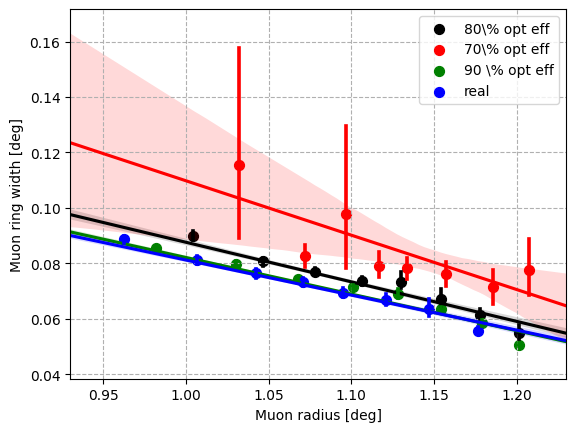

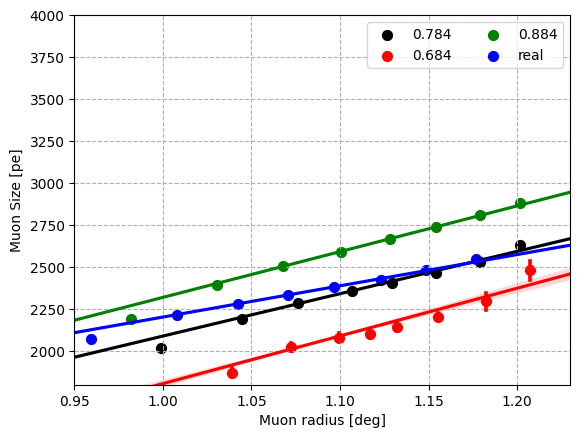

In [56]:
bin_number = 8

def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        #ax.set_ylim(0.042,0.07)
        ax.set_xlim(0.93,1.23)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(1800,4000)
        #ax2.set_xlim(1.05,1.22)
        ax2.set_xlim(0.95,1.23)

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax, color = 'k', label = '80\% opt eff')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_width'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax, color = 'r', label = '70\% opt eff')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_width'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax, color = 'green', label = '90 \% opt eff')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)][:4000], 
            y = df_good_data_real['ring_width'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)][:4000], 
            x_bins=bin_number, ax=ax, color = 'blue', label = 'real')

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax2, color = 'k', label = '0.784')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_size'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax2, color = 'r', label = '0.684')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_size'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax2, color = 'green', label = '0.884')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)][4000:8000], 
            y = df_good_data_real['ring_size'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)][4000:8000], 
            x_bins=bin_number, ax=ax2, color = 'blue', label = 'real')



format_axes(ax,'width')        
format_axes(ax2,'size') 

In [100]:
#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/*')
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

#df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[0:5]] # [0:5] for 19-22 years, [5:] for 22-23 years
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[10:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500) & (df_all_data['ring_completeness'] > 0.9)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
33,43060,1.702010e+09,-1,2375.1882,0.0,1.142753,0.054823,1.006954,0.077113,True,...,2.290008,0.655600,-2.194157e+00,0.065682,-0.184402,-0.129447,332,0.524874,16,0
61,75240,1.702010e+09,-1,2356.8918,0.0,-0.860720,-0.406263,1.025423,0.087414,True,...,2.328465,1.376503,-1.878028e+00,0.067919,-0.026974,-0.091028,364,0.069657,12,0
213,251461,1.702010e+09,-1,2555.4592,0.0,-0.032763,0.414136,1.192138,0.044552,True,...,2.847155,2.650550,-1.039652e+00,0.040433,0.219683,0.675974,492,0.525163,14,0
367,404345,1.702010e+09,-1,2681.1020,0.0,0.250980,0.459559,1.181148,0.058185,True,...,3.893631,3.573521,-1.546060e+00,0.049841,0.236159,0.254818,479,0.338786,12,0
453,486255,1.702010e+09,-1,2325.1519,0.0,-0.844068,0.204805,1.149227,0.070809,True,...,3.945212,0.850440,-3.852460e+00,0.056128,-0.083134,0.214622,452,0.203683,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883801,4832271,1.674713e+09,-1,2451.2640,0.0,0.064439,-0.431779,1.149180,0.050668,True,...,2.305934,1.634509,1.626564e+00,0.047984,0.176765,-0.377433,460,0.309496,11,0
8883844,4860051,1.674713e+09,-1,2450.8203,0.0,-0.743894,-0.118593,1.146008,0.109167,True,...,4.624393,3.152691,-3.383128e+00,0.093707,0.612962,-0.400181,455,0.156043,13,0
8883951,4941715,1.674713e+09,-1,2117.2670,0.0,0.176642,-1.167494,0.975700,0.070373,True,...,2.864238,-2.864238,-1.374788e-11,0.054849,0.171876,0.039867,326,0.334501,9,0
8883999,4980140,1.674713e+09,-1,2393.4565,0.0,-0.472382,0.798678,1.154532,0.038051,True,...,4.631013,-3.373000,-3.173193e+00,0.041282,0.147956,0.381999,456,0.092764,11,0


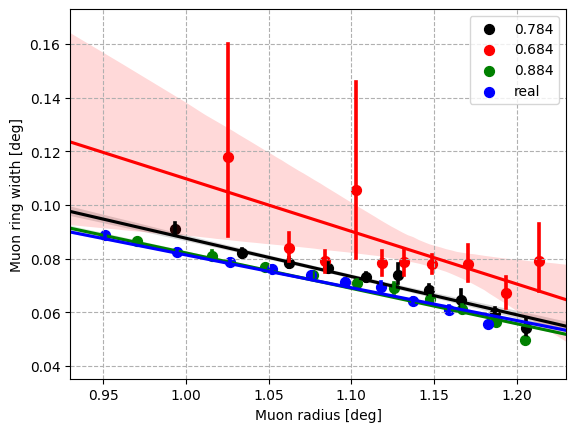

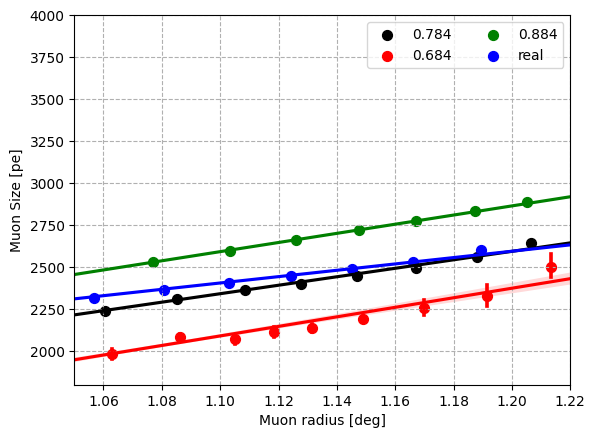

In [48]:
def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        #ax.set_ylim(0.042,0.07)
        ax.set_xlim(0.93,1.23)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(1800,4000)
        ax2.set_xlim(1.05,1.22)

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) &  (df_good_data['ring_size'] < 3000) & (df_good_data['ring_containment'] > 0.999) & (df_good_data['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'k', label = '0.784')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_width'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_2['ring_containment'] > 0.999) & (df_good_data_2['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'r', label = '0.684')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_width'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['ring_containment'] > 0.999) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'green', label = '0.884')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_real['ring_width'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)& (df_good_data_real['muon_efficiency'] < 1) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax, color = 'blue', label = 'real')

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside) & (df_good_data['ring_containment'] > 0.999)  &  (df_good_data['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'k', label = '0.784')
sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_2['ring_size'][(df_good_data_2['ring_completeness'] > 0.9) & (df_good_data_2['size_outside'] < size_outside) & (df_good_data_2['ring_containment'] > 0.999)  &  (df_good_data_2['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'r', label = '0.684')
sns.regplot(x = df_good_data_3['ring_radius'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            y = df_good_data_3['ring_size'][(df_good_data_3['ring_completeness'] > 0.9) & (df_good_data_3['size_outside'] < size_outside) & (df_good_data_3['ring_containment'] > 0.999)  &  (df_good_data_3['ring_size'] < 3000) & (df_good_data_3['muon_efficiency'] < 1)], 
            x_bins=10, ax=ax2, color = 'green', label = '0.884')
sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)], 
            y = df_good_data_real['ring_size'][(df_good_data_real['ring_completeness'] > 0.9) & (df_good_data_real['size_outside'] < size_outside) &  (df_good_data_real['ring_size'] < 3000)], 
            x_bins=10, ax=ax2, color = 'blue', label = 'real')



format_axes(ax,'width')        
format_axes(ax2,'size') 

event_id                         2.000000e+00
event_time                       1.655767e+09
mc_energy                       -1.000000e+00
ring_size                        2.982953e+02
size_outside                     0.000000e+00
ring_center_x                   -1.462366e+00
ring_center_y                   -1.463683e+00
ring_radius                      8.000000e-01
ring_width                       1.627072e-03
good_ring                        1.000000e+00
muon_efficiency                  4.285701e-02
ring_containment                 9.990157e-01
ring_completeness                0.000000e+00
impact_parameter                 2.219009e+00
impact_x_array                  -9.985509e+00
impact_y_array                  -9.985115e+00
radial_stdev                     1.933667e-02
radial_skewness                 -1.337262e+00
radial_excess_kurtosis          -1.469849e+00
num_pixels_in_ring               1.740000e+02
mean_pixel_charge_around_ring   -3.122977e+00
hg_peak_sample                   0

In [28]:
min_values = df_good_data.min()
print(min_values)

event_id                               100
event_time                             NaN
mc_energy                         0.006104
ring_size                        710.12146
size_outside                           0.0
ring_center_x                    -2.689439
ring_center_y                    -2.552436
ring_radius                       0.800003
ring_width                        0.002186
good_ring                             True
muon_efficiency                   0.041056
ring_containment                  0.304517
ring_completeness                      0.0
impact_parameter                  2.219018
impact_x_array                   -9.981697
impact_y_array                   -9.971321
radial_stdev                      0.027392
radial_skewness                  -1.389602
radial_excess_kurtosis           -1.403252
num_pixels_in_ring                     149
mean_pixel_charge_around_ring     0.930647
hg_peak_sample                         NaN
lg_peak_sample                         NaN
dtype: obje

In [39]:
print(f"ring widht sim {max(df_good_data['ring_width'][df_good_data['muon_efficiency'] < 1])}")
print(f"ring widht real {max(df_good_data_real['ring_width'])}")

ring widht sim 1.1206860544583235
ring widht real 1.663989334637321


### Binned distribution for simulations

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/568398268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=70)


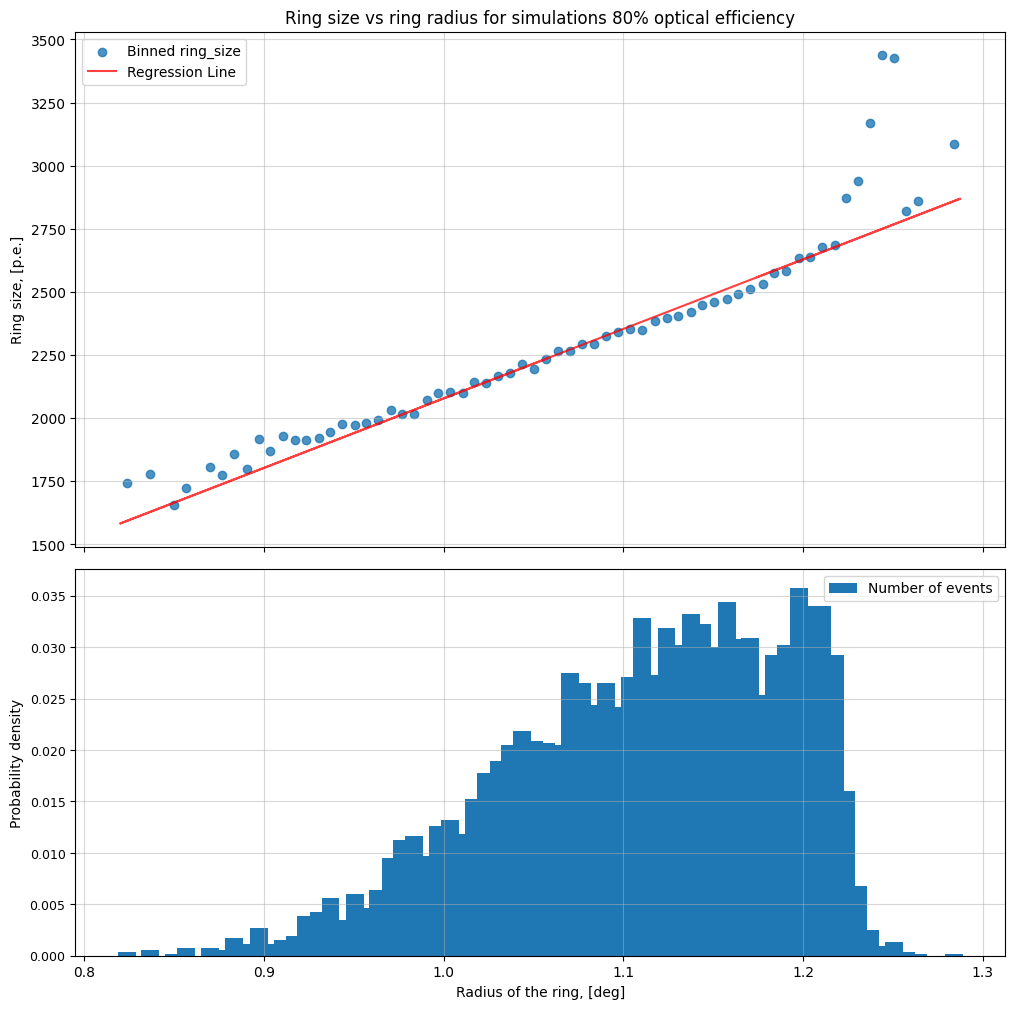

In [119]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=70)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = df_good_data.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)

ax = axes[0]
ax.set_title("Ring size vs ring radius for simulations (80% optical efficiency)")
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Ring size, [p.e.]')
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
ax.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=0.01, label="Number of events")
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/4079968018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data_2[f'{x_value_str}_bin'] = pd.cut(df_good_data_2[x_value_str], bins=100)


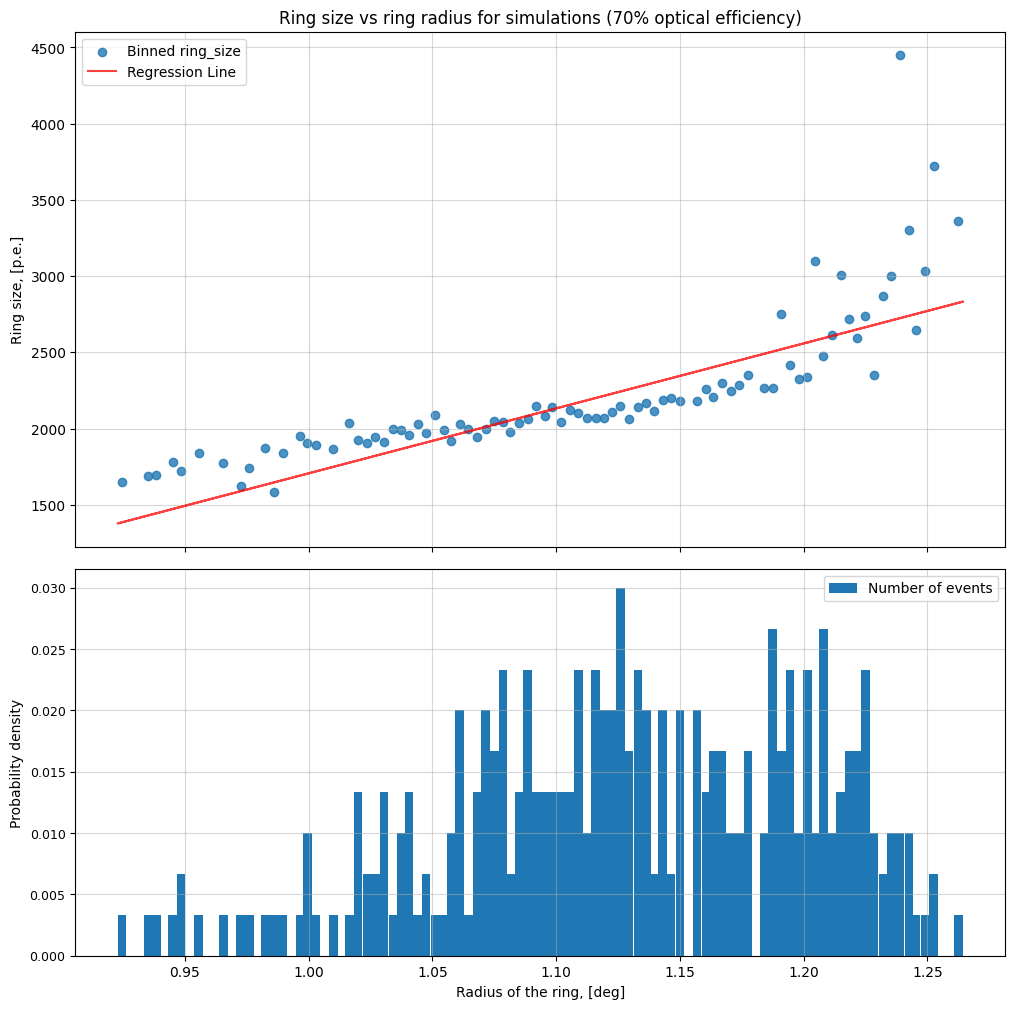

In [121]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
df_good_data_2[f'{x_value_str}_bin'] = pd.cut(df_good_data_2[x_value_str], bins=100)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data_2.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = df_good_data_2.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.set_title("Ring size vs ring radius for simulations (70% optical efficiency)")
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Ring size, [p.e.]')
m, b = np.polyfit(df_good_data_2[x_value_str], df_good_data_2[y_value_str], 1)
ax.plot(df_good_data_2[x_value_str], m*df_good_data_2[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=(max(x_pos)-min(x_pos))/(len(x_pos)-2), label="Number of events")
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/4236443592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data_3[f'{x_value_str}_bin'] = pd.cut(df_good_data_3[x_value_str], bins=70)


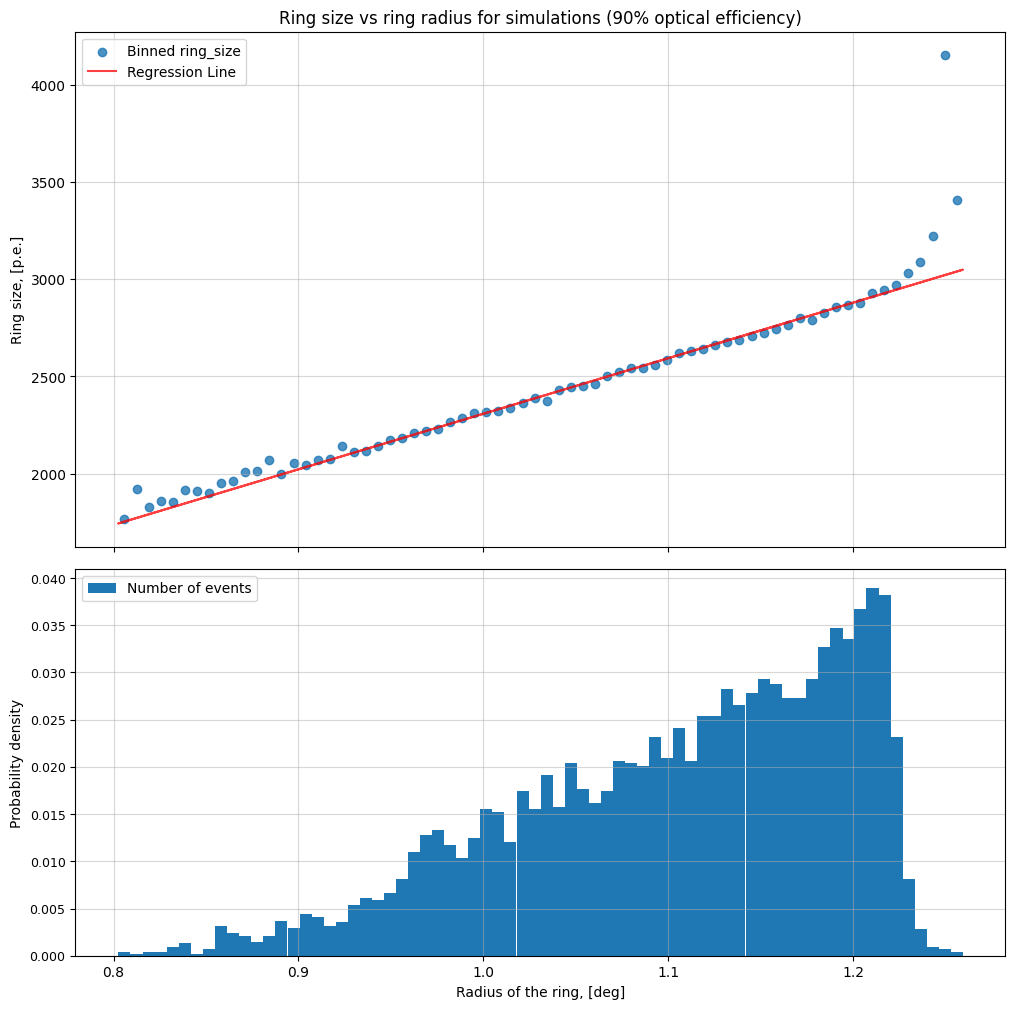

In [122]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
df_good_data_3[f'{x_value_str}_bin'] = pd.cut(df_good_data_3[x_value_str], bins=70)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data_3.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = df_good_data_3.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.set_title("Ring size vs ring radius for simulations (90% optical efficiency)")
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Ring size, [p.e.]')
m, b = np.polyfit(df_good_data_3[x_value_str], df_good_data_3[y_value_str], 1)
ax.plot(df_good_data_3[x_value_str], m*df_good_data_3[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=(max(x_pos)-min(x_pos))/(len(x_pos)-2), label="Number of events")
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_51351/3182212600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data_real_small[f'{x_value_str}_bin'] = pd.cut(df_good_data_real_small[x_value_str], bins=70)


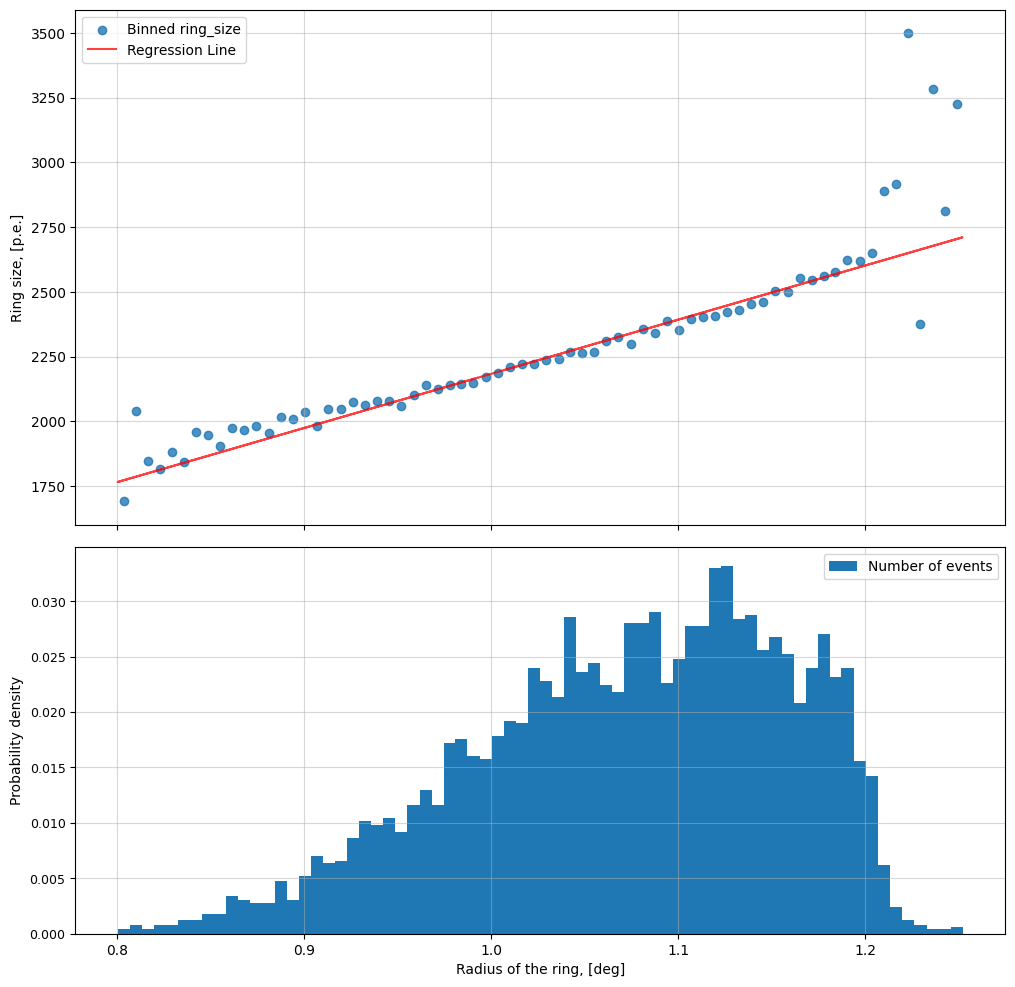

In [115]:
df_good_data_real_small = df_good_data_real[:5000]
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
df_good_data_real_small[f'{x_value_str}_bin'] = pd.cut(df_good_data_real_small[x_value_str], bins=70)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data_real_small.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = df_good_data_real_small.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Ring size, [p.e.]')
m, b = np.polyfit(df_good_data_real_small[x_value_str], df_good_data_real_small[y_value_str], 1)
ax.plot(df_good_data_real_small[x_value_str], m*df_good_data_real_small[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=(max(x_pos)-min(x_pos))/(len(x_pos)-2), label="Number of events")
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


In [106]:
min(df_good_data_real['ring_containment'])

0.9994842602725258

In [107]:
min(df_good_data['ring_containment'])

1.0

### Check for min/max values in real data and simulations to check the cut consistency

In [83]:
min_values = df_good_data_real.min()
print(min_values)

event_id                                         3
event_time                       1669076842.842606
mc_energy                                       -1
ring_size                                359.07767
size_outside                                   0.0
ring_center_x                            -1.461518
ring_center_y                              -1.4621
ring_radius                                    0.8
ring_width                                0.001627
good_ring                                     True
muon_efficiency                           0.042857
ring_containment                          0.999016
ring_completeness                              0.0
impact_parameter                           2.21901
impact_x_array                           -9.985509
impact_y_array                           -9.984942
radial_stdev                              0.019337
radial_skewness                          -1.337262
radial_excess_kurtosis                   -1.326292
num_pixels_in_ring             

In [84]:
min_values = df_good_data.min()
print(min_values)

event_id                                    100
event_time                                  NaN
mc_energy                              0.006104
ring_size                            882.740662
size_outside                                0.0
ring_center_x                         -1.454359
ring_center_y                         -1.452181
ring_radius                            0.800014
ring_width                             0.002207
good_ring                                  True
muon_efficiency                        0.041056
ring_containment                       0.999234
ring_completeness                           0.0
impact_parameter                       2.219043
impact_x_array                         -9.98004
impact_y_array                        -9.971321
radial_stdev                           0.027839
radial_skewness                       -1.389602
radial_excess_kurtosis                -1.403252
num_pixels_in_ring                          197
mean_pixel_charge_around_ring           

In [108]:
print(f"ring widht sim {max(df_good_data['ring_width'])}")
print(f"ring widht real {max(df_good_data_real['ring_width'])}")

ring widht sim 0.927786215403197
ring widht real 0.9785768432855312


In [109]:
print(f"ring widht sim {max(df_good_data['size_outside'])}")
print(f"ring widht real {max(df_good_data_real['size_outside'])}")

ring widht sim 59.49026870727539
ring widht real 166.67096


In [110]:
print(f"muon efficiency sim {max(df_good_data['muon_efficiency'])}")
print(f"muon_efficiency real {max(df_good_data_real['muon_efficiency'])}")

muon efficiency sim 0.9082737170705991
muon_efficiency real 0.9902512452996892


In [111]:
print(f"ring completeness sim {min(df_good_data['ring_completeness'])}")
print(f"ring completeness real {min(df_good_data_real['ring_completeness'])}")

ring completeness sim 0.9333333333333333
ring completeness real 0.9333333333333332


In [112]:
print(f"size of the sample sim 70% {len(df_good_data_2)}")
print(f"size of the sample sim 80% {len(df_good_data)}")
print(f"size of the sample sim 90% {len(df_good_data_3)}")
print(f"size of the observation sample {len(df_good_data_real)}")

size of the sample sim 70% 300
size of the sample sim 80% 5170
size of the sample sim 90% 5390
size of the observation sample 146355
